# Pymaceuticals Inc.
---

### Analysis

- Navneet Kaur
Module 5

Final Analysis:

One mouse ID has duplicate values.

Capomulin and Ramicane has almost same number of rows. Propriva has least number of rows.

The distribution of male and female has minor difference.

Only Infubinol among all has one outliers.

Capomulin treatment of mouse l512: there is a drop in Tumor volume as days increase.

The relationship between Average Tumor volume and weight shows rising growth.


 

In [194]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study=pd.merge(study_results,mouse_metadata,on=["Mouse ID"])

# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [195]:
# Checking the number of mice.
count_mouse=mouse_metadata['Mouse ID'].count()
count_mouse

249

In [196]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate=mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID','Timepoint']), 'Mouse ID'].unique()
duplicate


array(['g989'], dtype=object)

In [197]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df=mouse_study.loc[mouse_study['Mouse ID']==duplicate[0],:]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [198]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean=mouse_study[mouse_study['Mouse ID'].isin(duplicate_df['Mouse ID'])==False]
mouse_study_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [200]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_number=mouse_study_clean['Mouse ID'].unique()
len(clean_mouse_number)

248

## Summary Statistics

In [201]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
statictics_mean=mouse_study_clean.groupby(mouse_study_clean['Drug Regimen'])['Tumor Volume (mm3)'].mean()
statictics_median=mouse_study_clean.groupby(mouse_study_clean['Drug Regimen'])['Tumor Volume (mm3)'].median()
statictics_variance=mouse_study_clean.groupby(mouse_study_clean['Drug Regimen'])['Tumor Volume (mm3)'].var()
statictics_std=mouse_study_clean.groupby(mouse_study_clean['Drug Regimen'])['Tumor Volume (mm3)'].std()
statictics_sem=mouse_study_clean.groupby(mouse_study_clean['Drug Regimen'])['Tumor Volume (mm3)'].sem()
statictics_df=pd.DataFrame({"Mean Tumor Volume":statictics_mean,
                           "Median Tumor Volume":statictics_median,
                           "Tumor Volume Variance":statictics_variance,
                           "Tumor Volume Std. Dev.":statictics_std,
                           "Tumor Volume Std. Err.":statictics_sem})
statictics_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [202]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_statictics_df=mouse_study_clean.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
advanced_statictics_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

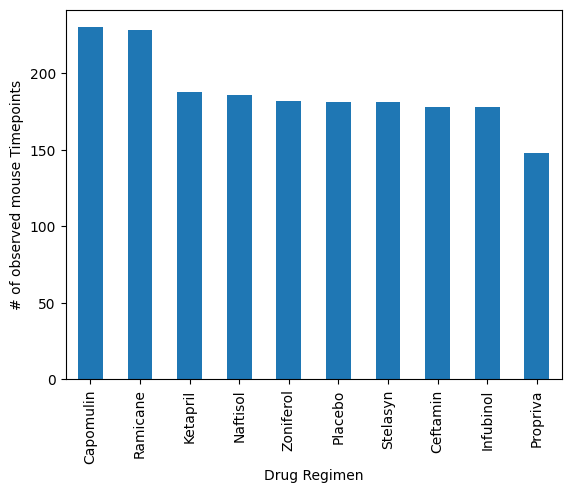

In [203]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar=mouse_study_clean.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

pandas_bar_final=pandas_bar.plot.bar(x='pandas_bar',ylabel="# of observed mouse Timepoints",xlabel="Drug Regimen")


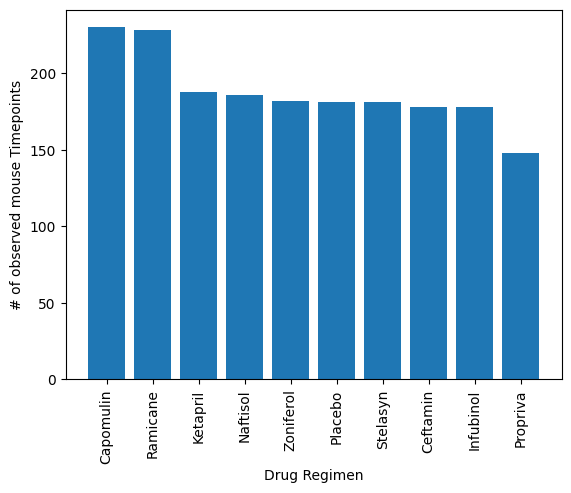

In [204]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_bar=mouse_study_clean.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

x_axis = np.arange(len(pyplot_bar))

plt.bar(x_axis,pyplot_bar, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, pyplot_bar.index,rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse Timepoints")

plt.show()

<Axes: ylabel='Sex'>

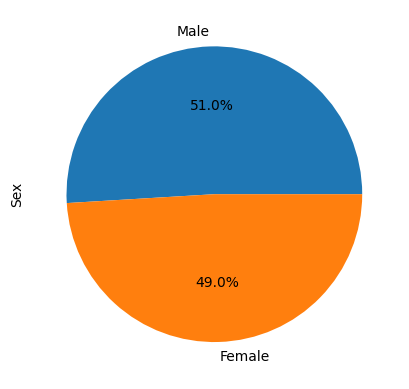

In [205]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data=mouse_study_clean['Sex'].value_counts()
sex_data.plot.pie(autopct= "%1.1f%%",ylabel="Sex")


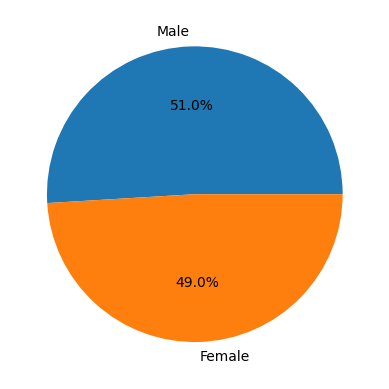

In [206]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data=mouse_study_clean['Sex'].value_counts()
plt.pie(sex_data,autopct="%1.1f%%", labels=sex_data.index.values)
plt.show()


## Quartiles, Outliers and Boxplots

In [207]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
new_reduced=mouse_study_clean.loc[(mouse_study_clean['Drug Regimen']=='Capomulin') | (mouse_study_clean['Drug Regimen']=='Ramicane') | (mouse_study_clean['Drug Regimen']=='Infubinol') | (mouse_study_clean['Drug Regimen']=='Ceftamin')]
new_reduced
# Start by getting the last (greatest) timepoint for each mouse
last_tp=new_reduced.groupby(["Drug Regimen","Mouse ID"]).last()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tp=last_tp.reset_index()

last_tp


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
95,Ramicane,s508,45,30.276232,0,Male,1,17
96,Ramicane,u196,45,40.667713,3,Male,18,25
97,Ramicane,w678,5,43.166373,0,Female,5,24
98,Ramicane,y449,15,44.183451,0,Male,19,24


In [218]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


for drug in treatments:
    each_drug=last_tp.loc[last_tp['Drug Regimen']==drug,:]
    quartiles = each_drug['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    
    #print(f"The lower quartile of {drug} is: {lowerq}")
    #print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    #print(f"The the median of {drug} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #print(f"Values below {lower_bound} could be outliers.")
    #print(f"Values above {upper_bound} could be outliers.")
    outliers_drug=each_drug.loc[(each_drug['Tumor Volume (mm3)'] < lower_bound) | (each_drug['Tumor Volume (mm3)'] > upper_bound)]
    print(f"The outlier of {drug} are {outliers_drug['Tumor Volume (mm3)']}")
    
    
    #if(len(outliers_drug)==0):
    #    print(f"{drug} has no Outliers")
    #else:
    #    print(f"{drug} has outliers : ") 
    #    print(outliers_drug["Tumor Volume (mm3)"])   
    print("------------------------------------------------------------------------------")
    tumor_vol.append(each_drug.loc[:,'Tumor Volume (mm3)'])




The interquartile range of Capomulin is: 7.781863460000004
The outlier of Capomulin are Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------------------------
The interquartile range of Ramicane is: 9.098536719999998
The outlier of Ramicane are Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------------------------
The interquartile range of Infubinol is: 11.477135160000003
The outlier of Infubinol are 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
------------------------------------------------------------------------------
The interquartile range of Ceftamin is: 15.577752179999997
The outlier of Ceftamin are Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------------------------


C:\Users\Kunwar\AppData\Local\Temp\ipykernel_4292\2089604635.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(treatments)


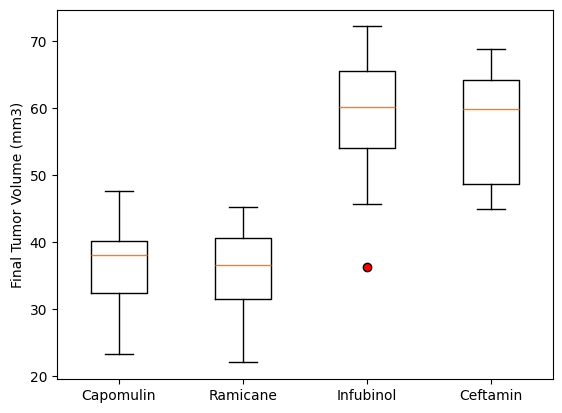

In [209]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)
ax1.boxplot(tumor_vol,flierprops = dict(markerfacecolor = "red"))
plt.show()

## Line and Scatter Plots

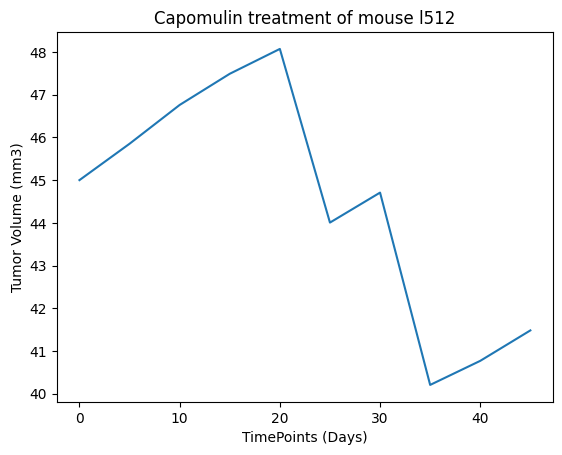

In [210]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_scatter=mouse_study_clean.loc[(mouse_study_clean['Mouse ID']=='l509'),:]
line_scatter

x_axis=line_scatter["Timepoint"]
y_axis=line_scatter['Tumor Volume (mm3)']

fig2, ax2 = plt.subplots()
ax2.plot(x_axis,y_axis)
ax2.set_ylabel("Tumor Volume (mm3)")
ax2.set_title("Capomulin treatment of mouse l512")
ax2.set_xlabel("TimePoints (Days)")
plt.show()


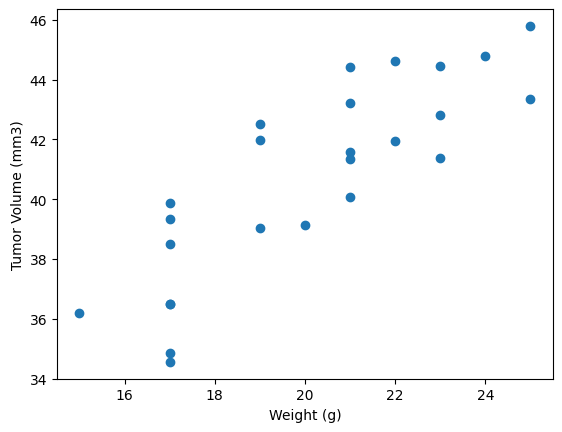

In [211]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight=mouse_study_clean.loc[(mouse_study_clean["Drug Regimen"]=="Capomulin"),:]
avg_tumor=mouse_weight.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_weight=mouse_weight.groupby("Mouse ID")["Weight (g)"].mean()

fig2, ax3 = plt.subplots()
ax3.scatter(avg_weight,avg_tumor)
ax3.set_ylabel("Tumor Volume (mm3)")
ax3.set_xlabel("Weight (g)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


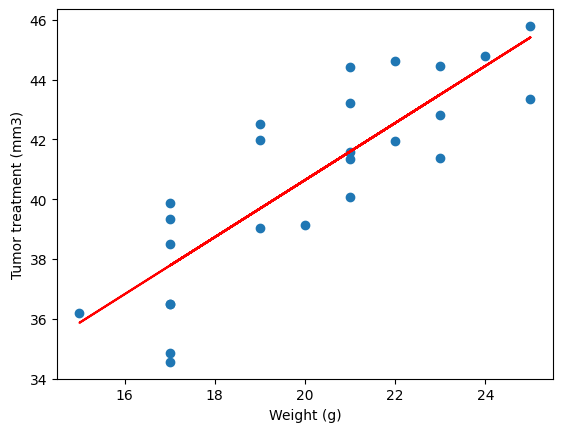

In [212]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_tumor,avg_weight)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor)
regress_values = avg_weight * slope + intercept
from importlib import reload
plt=reload(plt)
plt.scatter(avg_weight,avg_tumor)
plt.plot(avg_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor treatment (mm3)")
plt.show()